<a href="https://colab.research.google.com/github/BeesieJF/BeesieJF/blob/main/WiD_PFL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PAID FAMILY LEAVE AND WORKPLACE INEQUALITY

![](https://www.commondreams.org/sites/default/files/styles/banner_image_1x_xl/public/2022-09/Paid-Leave-Getty_0.jpg.webp?h=55058666&itok=r9JKzq9V)

## INTRODUCTION:

**Paid Family Leave(PFL)** is an employee funded benefit program aimed to provide wage replacement (a percentage of one's income) to eligible workers that take time off work to:
- bond with a newborn baby, adopted or foster child and/or
- care for a seriously ill spouse, child or family members

Paid Family Leave is a benefit that often includes paid leave benefits for childbirth, childcare, caregiving, adoption, and more.

**Unpaid Parental or Family Leave** is provided when an employer is required to hold an employee's job while the employer is on leave. 

This report aims to use the dataset to analyze the relationship between paid family leave and gender equality in the workplace, to determine countries with paid family leave, the length of leave days available to women and if there are options of leave benefits as well for fathers.

### Questions of Interest
- How does Paid Family Leave (PFL) differ around the world? 

- How does PFL vary by geography, industry, gender, role?

- What are the varying impacts of different Paid Family Leave policies? 

- How have these PFL policies changed over time?

- What impact does Paid Family Leave have on the overall gender gap in the workplace?

- Does Unpaid leave have any effect on Workplace Inequality?

- What impact will gender-neutral paid leave policies have on Workplace Inequality? 

In [1]:
# Import all the relevant packages
import numpy as np # for linear algebra
import pandas as pd # for data manipulation and analysis

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns # for data visualization and plots
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install celluloid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Check it worked
import celluloid
import io

In [4]:
# loading files
from google.colab import files

In [ ]:
# To access files, you have to connect your drive to the notebook

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# To upload files
uploaded = files.upload()

Saving happiness.csv to happiness.csv


### Methodology (Part 1):
- Read in the dataset to be used
- Convert the column 'Is there paid parental leave?' into a binary column
- Do some basic analysis
- One hot encode some categorical variables

In [7]:
# Read in the data
#df1 = pd.read_csv('/data/drive/MyDrive/happiness.csv', encoding='latin-1')
#df2 = pd.read_csv('/data/drive/myDrive/paid_leave.csv', encoding='latin-1')
df1 = pd.read_csv('/content/drive/MyDrive/WBL_leave_data.csv', encoding='latin-1')
df1.head()
#df2 = pd.read_csv('/content/drive/MyDrive/paid_leave.csv')
#df2.head()

,Economy,Economy Code,ISO Code,Region,Income Group,Report Year,PARENTHOOD SCORE,Is paid leave of at least 14 weeks available to mothers?,Score,Legal Basis,...,Length of paid paternity leave,Is there paid parental leave?,Score.3,Legal Basis.3,Shared days,Days for the mother,Days for the father,Is dismissal of pregnant workers prohibited?,Score.4,Legal Basis.4
0,Afghanistan,AFG,AFG,South Asia,Low income,1971,0,No,0,No applicable provisions could be located,...,0,No,0,No applicable provisions could be located,0,0,0,No,0,No applicable provisions could be located
1,Afghanistan,AFG,AFG,South Asia,Low income,1972,0,No,0,No applicable provisions could be located,...,0,No,0,No applicable provisions could be located,0,0,0,No,0,No applicable provisions could be located
2,Afghanistan,AFG,AFG,South Asia,Low income,1973,0,No,0,No applicable provisions could be located,...,0,No,0,No applicable provisions could be located,0,0,0,No,0,No applicable provisions could be located
3,Afghanistan,AFG,AFG,South Asia,Low income,1974,0,No,0,No applicable provisions could be located,...,0,No,0,No applicable provisions could be located,0,0,0,No,0,No applicable provisions could be located
4,Afghanistan,AFG,AFG,South Asia,Low income,1975,0,No,0,No applicable provisions could be located,...,0,No,0,No applicable provisions could be located,0,0,0,No,0,No applicable provisions could be located


In [15]:
g = df1['Region'].unique()
g


array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'High income: OECD',
       'East Asia & Pacific'], dtype=object)

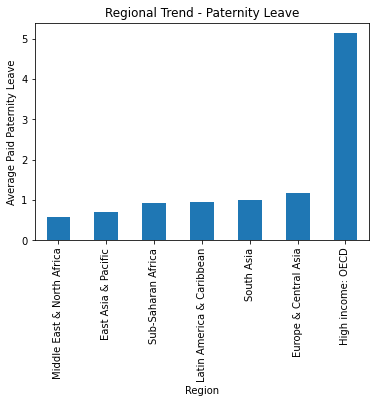

In [9]:
(
    df1
    .groupby("Region")
    ["Length of paid paternity leave"].mean()
    .sort_values(ascending=True)
    .plot(
        kind="bar",
        xlabel="Region",
        ylabel="Average Paid Paternity Leave",
        title="Regional Trend - Paternity Leave"
    )
)   

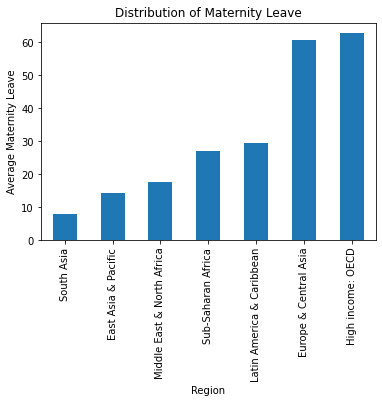

In [14]:
(
    df1
    .groupby("Region")
    ["PARENTHOOD SCORE"].mean()
    .sort_values(ascending=True)
    .plot(
        kind='bar',
        xlabel="Region",
        ylabel="Average Maternity Leave",
        title="Distribution of Maternity Leave"
    )
)   

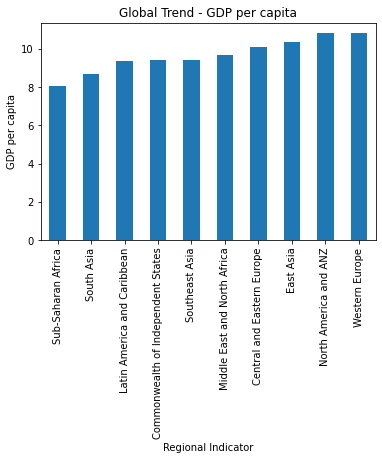

In [9]:
(
    df1
    .groupby("Regional indicator")
    ["Logged GDP per capita"].mean()
    .sort_values(ascending=True)
    .plot(
        kind="bar",
        xlabel="Regional Indicator",
        ylabel="GDP per capita",
        title="Global Trend - GDP per capita"
    )
)   

In [10]:
df2 = pd.read_csv('/content/drive/MyDrive/paid_leave.csv')
df2.head()

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
0,Length of paid maternity leave (calendar days),SH.MMR.LEVE,Afghanistan,AFG,2021,90,female
1,Length of paid maternity leave (calendar days),SH.MMR.LEVE,Afghanistan,AFG,2020,90,female
2,Length of paid maternity leave (calendar days),SH.MMR.LEVE,Afghanistan,AFG,2019,90,female
3,Length of paid maternity leave (calendar days),SH.MMR.LEVE,Afghanistan,AFG,2018,90,female
4,Length of paid maternity leave (calendar days),SH.MMR.LEVE,Afghanistan,AFG,2017,90,female


In [14]:
# Understanding what the data content looks like
df2.shape
print(f"The paid family leave has {df2.shape[0]} rows and {df2.shape[1]} columns")

The paid family leave has 29484 rows and 7 columns


In [15]:
# Data types contained in the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29484 entries, 0 to 29483
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Indicator Name  29484 non-null  object
 1   Indicator Code  29484 non-null  object
 2   Country Name    29484 non-null  object
 3   Country Code    29484 non-null  object
 4   Year            29484 non-null  int64 
 5   Value           29484 non-null  int64 
 6   Disaggregation  29484 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.6+ MB


Text(0.5, 1.0, 'Global Trend in Paid Leave')

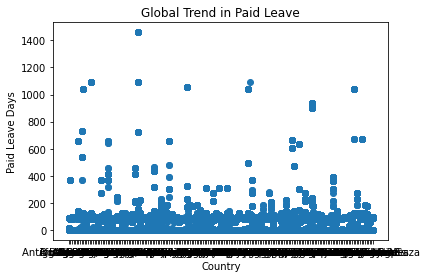

In [15]:
plt.scatter(x=df2['Country Name'], y=df2['Value'])
plt.xlabel("Country")
plt.ylabel("Paid Leave Days")
plt.title("Global Trend in Paid Leave")
#plt.xscale(value="logit")

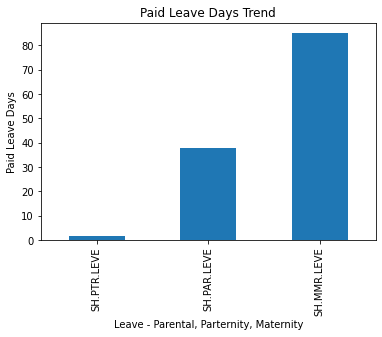

In [17]:
(
    df2
    .groupby("Indicator Code")
    ["Value"].mean()
    .sort_values(ascending=True)
    .plot(
        kind="bar",
        xlabel="Leave - Parental, Parternity, Maternity",
        ylabel="Paid Leave Days",
        title="Paid Leave Days Trend"
    )
)   

**Observations**:
- There are no null values in the data, the data looks cleaned
- The dataframe contains 9 object columns and 9 numerical columns

 ### Dataset Variables
 
 - **Country**: Country/Economy of the world                                                          
 - **ISO Code**: Country code                                                          
 - **Region**: Country region                                                          
 - **Income Group**: Income group of women in that country                                                      
 - **Report Year**: Year report was conducted                                                       
 - **WBL INDEX**: Women, Business and Law Equality Index/Score                                                         
 - **PAY Score**: Score for job pay                                                          
 - **PFL Score**: Pail Family Leave Score                                                         
 - **Is paid leave of at least 14 weeks available to mothers?**: Noting countries with longer leave days for mothers           
 - **Length of paid maternity leave**: Length of maternity leave days                                    
 - **Does the government administer 100% of maternity leave benefits?**: Government support of maternity leave   
 - **Is there paid leave available to fathers?**:                         
 - **Length of paid paternity leave**: Father's leave days                                                                     
 - **Shared days**: Days both parent can share their leave days                                                     
 - **Days for the mother**:                                               
 - **Days for the father**:                                            
 - **Is dismissal of pregnant workers prohibited?**: Enabling women to keep their jobs while being pregnant

**Target Variable:**
- **Is there paid parental leave?**: Indicative of countries with paid family leave 

## BASIC EDA
### Data Cleaning
- Check for duplicates and handle them
- Check for missing or null values and handle them

In [ ]:
# Check for duplicates in rows
df.duplicated().sum()

In [ ]:
# Check for duplicated columns
df.T.duplicated().sum()

In [ ]:
#Using .describe().T, we will get a quick breakdown of the summary statistics for numeric columns
# Use .T to take the transpose, this makes the columns the rows 
df.describe().T

In [ ]:
# check for null values in each column
df.isna().sum()/df.shape[0]

**Observations:**
- There are no duplicates in the dataset
- There are no null values present
- There is an average of 84 days of paid maternity leave for women
- There is an average of 1 day for paternity leave for fathers

## DATA VISUALIZATION DETAILS

In [ ]:
# Visualizing Maternity Leave days by Country Over the years
plt.figure(figsize=(10,6),dpi=150)
px.choropleth(
    data_frame = df,
    locations = 'Country',
    locationmode = 'country names',
    color = 'Length of paid maternity leave',
    animation_frame = 'Report Year',
    labels = {'Report Year': 'Year', 'Country': 'Country', 'Length of paid maternity leave': 'Maternity leave days'},
    color_continuous_scale = px.colors.colorbrewer.YlGn,
    range_color = [df['Length of paid maternity leave'].min(), df['Length of paid maternity leave'].max()],
    scope ='world',
    title ='Maternity Leave days by Country Over the years'
)

In [ ]:
# Visualizing Paternity Leave days by Country Over the years
plt.figure(figsize=(10,6),dpi=150)
px.choropleth(
    data_frame = df,
    locations = 'Country',
    locationmode = 'country names',
    color = 'Length of paid paternity leave',
    animation_frame = 'Report Year',
    labels = {'Report Year': 'Year', 'Country': 'Country', 'Length of paid paternity leave': 'Paternity leave days'},
    color_continuous_scale = px.colors.colorbrewer.YlGn,
    range_color = [df['Length of paid paternity leave'].min(), df['Length of paid paternity leave'].max()],
    scope ='world',
    title ='Paternity Leave days by Country Over the years'
)

In [ ]:
# Visualizing PFL Score days by Country Over the years
plt.figure(figsize=(10,6),dpi=150)
px.choropleth(
    data_frame = df,
    locations = 'Country',
    locationmode = 'country names',
    color = 'PFL Score',
    animation_frame = 'Report Year',
    labels = {'Report Year': 'Year', 'Country': 'Country', 'PFL Score': 'PFL Score'},
    color_continuous_scale = px.colors.colorbrewer.BuPu,
    range_color = [df['PFL Score'].min(), df['PFL Score'].max()],
    scope ='world',
    title ='Change in PFL Score of Countries Over the years'
)

**Observation:**
- France and Hungary with noticeable parental leave score of 80 as of 1971. This shows that there were already women who were income earners as of that time
- Russia and Canada had a significant score improvement from 1999
- Some countries with a 100% score include Australia, Russia, Canada, Sweden, France, Bulgaria, Columbia as of this present year 2022
- This is indicative of countries string to close the gender inequality gap in the workplace as regards to paid family leave

In [ ]:
# Countries with women as low income, middle income or high income earners
women_income = df.groupby(['Country', 'Income Group']).size()
women_income = women_income.to_frame(name = 'count').reset_index()
women_income

In [ ]:
# Countries where women are low income earners
low_income = women_income[women_income['Income Group'].isin(['Low income'])]
low_income

In [ ]:
# Countries where women are upper middle income earners
Upper_middle_income = women_income[women_income['Income Group'].isin(['Upper middle income'])]
Upper_middle_income

In [ ]:
# Countries where women are high income earners
high_income = women_income[women_income['Income Group'].isin(['High income'])]
high_income

In [ ]:
# Paid family leave or not
df['Is there paid parental leave?'].value_counts()

In [ ]:
# Paid family leave of this year
# Filter original dataset to year 2022
present_df = df[(df['Report Year']==2022)].copy()
present_df.head()

In [ ]:
# Paid family leave or not in present year
present_df['Is there paid parental leave?'].value_counts()

**Observation:**

In this year 2022, out of 190 countries, 50 countries have paid family benefit available for parents while 140 countries don't.

In [ ]:
df=pd.DataFrame(pd.read_csv("paid_leave.csv"))
df.head()

In [ ]:
pml = df[df['Indicator Code']=='SH.MMR.LEVE']
pml.rename(columns={'Value':'mat_leave'}, inplace=True)
pml.drop(['Disaggregation','Country Code','Indicator Code','Indicator Name'],axis=1, inplace=True)
pml.head()

In [ ]:
df['Indicator Code'].unique()

In [ ]:
ptr = df[df['Indicator Code']=='SH.PTR.LEVE']
ptr.rename(columns={'Value':'pat_leave'}, inplace=True)
ptr.drop(['Disaggregation','Country Code','Indicator Code','Indicator Name'],axis=1, inplace=True)
ptr.head()

In [ ]:
par = df[df['Indicator Code']=='SH.PAR.LEVE']
par.rename(columns={'Value':'par_leave'}, inplace=True)
par.drop(['Disaggregation','Country Code','Indicator Code','Indicator Name'],axis=1, inplace=True)
par.head()

In [ ]:
md_leave=pml.merge(ptr, how='outer', on=['Country Name','Year'])

In [ ]:
pl=md_leave.merge(par, how='outer', on=['Country Name','Year'])
pl.head()

In [ ]:
pl.corr()

In [ ]:
c=pl[pl['Year']==2021][['Country Name','par_leave']].sort_values(by=['par_leave'],ascending=False)
c[c['par_leave']>0].plot.bar(rot=0)

In [ ]:
# Countries with parental leave
c[c['par_leave']>0].shape[0]/c.shape[0]

In [ ]:
# Countries with paternal leave
c_pat=pl[pl['Year']==2021][['Country Name','pat_leave']].sort_values(by=['pat_leave'],ascending=False)
c_pat[c_pat['pat_leave']>0].shape[0]/c.shape[0]

In [ ]:
# Countries with maternal leave
c_mat=pl[pl['Year']==2021][['Country Name','mat_leave']].sort_values(by=['mat_leave'],ascending=False)
c_mat[c_mat['mat_leave']>0].shape[0]/c.shape[0]

In [ ]:
happ=pd.DataFrame(pd.read_csv("happ.csv"))
happ.head()

In [ ]:
leaves=pl[pl['Year']==2021]

In [ ]:
full_data=happ.merge(leaves,left_on='Country name',right_on='Country Name',how='inner')
full_data.head()

In [ ]:
full_data[['pat_leave','Ladder score']].corr()

In [ ]:
# Observations
# 94% of the countries have maternity leave 
# Around 55% of countries have paternity leave
# Only 17% of the countries have paid parental leaves
# Over the years, we have seen a growth in paternity leaves and parental leaves being provided (growth in paternity leaves is more than growth in paid parental leave)
# High maternity leaves is correlated positively with high paid parental leave as well
# Increase in paternity leave is positively correlated with happiness score of the country. The hypothesis we can form is that when paternity leaves are provided, men are able to support women thus sharing the child workload and contributing towards positive happiness of the country. This hypothesis can be tested with other factors that contribute to the happiness of a country to see how much of a weight leaves has on the happiness index.